# Lab: Gradient Descent and Stochastic Gradient Descent

Import first all these librairies   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for nicer plots
sns.set_theme()


In this lab, we aim to apply GD and SGD to some particular functions

## I. Application on a one-dimensional case

We fist start with applying GD to the one-dimensional function: 
$$
f_1: w \mapsto w^2 -w/2+1- \log[1+\exp(w/2+1)].
$$


Q1. First plot this function on $[-1,1]$.

In [ ]:
x = np.linspace(-1, 1, 100)


def f(x):
    return x**2 - x/2 + 1 - np.log(1 + np.exp(x/2 + 1))


fig, ax = plt.subplots()
ax.scatter(x, f(x))


Q2. Compute the derivative of $f_1$ and implement this  function.

In [ ]:
def f_prime(x):
    return 2*x - 1/2 - 1/(1+np.exp(x/2 + 1)) * np.exp(x/2 + 1)*1/2


fig, ax = plt.subplots()
ax.scatter(x, f_prime(x))


Q3. Is $f_1$ convex? 

$ f_1''(x)>0 $ hence $f_1$ is convex

Q4. We aim to apply GD to $f_1$. Implement a function which takes as input 
- the derivative of the function to minimize
- an initial condition
- a stepsize/learning rate 
- a number of iterations

and ouputs

- the list of iterates of GD
- the list of the evaluations of the derivative of the function at the iterates

In [4]:
def gradient_descent(f_prime, x_0, alpha, n_iter):
    """perform gradient descent given f_prime, starting point, stepsize and number of iterations

    Args:
        f_prime (function): derivative of the function to minimize
        x_0 (array): starting point of the algorithm
        alpha (float): learning rate
        n_iter (int): nummber of iteration

    Returns:
        list of x
        list of f'(x)
    """
    if type(x_0) != np.ndarray:
        x = np.zeros(n_iter+1)
        x[0] = x_0
        for i in range(1, n_iter+1):

            x[i] = x[i-1] - alpha * f_prime(x[i-1])
        return x, f_prime(x)

    else:
        x = np.zeros((n_iter+1, x_0.shape[0]))
        f_eval = np.zeros((n_iter+1, x_0.shape[0]))
        x[0] = x_0
        f_eval[0] = f_prime(x_0)

        for i in range(1, n_iter+1):

            x[i] = x[i-1] - alpha * f_eval[i-1]
            f_eval[i] = f_prime(x[i])
        return x, f_eval


Q5. Apply GD to $f_1$ and plot the iterates and the functions at the iterates.

In [ ]:
x, f_prime_evaluated = gradient_descent(f_prime, 1, 0.01, 100)

fig, ax = plt.subplots()
ax.scatter(x, f(x), alpha=0.5)


Q6. (Optional) Estimate the rate of convergence of GD for $f_1$. To this end, only 100 hundred iterations are sufficient starting from $1$.

We now consider the one-dimensional function: 
$$
f_2 : w \mapsto w^2 + \cos(2\pi w) -\log(1+4 w^2) +w.
$$
Q7. First plot this function on $[-3,3]$.

In [ ]:
def f_2(x):
    return x**2 + np.cos(2*np.pi*x) - np.log(1+4*x**2) + x


x = np.linspace(-3, 3, 300)


fig, ax = plt.subplots()
ax.scatter(x, f_2(x))


Q8. Is this function is convex?

No

Q9. Apply GD using different initialization and plot the evaluation of $f_2$ at the resulting iterates.

In [ ]:
def f2_prime(x):
    return 2*x - np.sin(2*np.pi*x)*2*np.pi - 1/(1 + 4*x**2) * 8*x + 1


fig, ax = plt.subplots()
ax.scatter(x, f2_prime(x))
ax.scatter(x, f_2(x))


In [ ]:
x, f_prime_evaluated = gradient_descent(f2_prime, -1.5, 0.01, 100)

fig, ax = plt.subplots()
ax.scatter(x, f_2(x), alpha=0.5)


## II. Application on the Rosenbrock function

In [9]:
# function to perform gradient descent

def gradient_descent(f_prime, x_0, alpha, n_iter):
    """perform gradient descent given f_prime, starting point, stepsize and number of iterations

    Args:
        f_prime (function): derivative of the function to minimize
        x_0 (array): starting point of the algorithm
        alpha (float): learning rate
        n_iter (int): nummber of iteration

    Returns:
        list of x
        list of f'(x)
    """

    # case where d = 1
    if type(x_0) != np.ndarray:
        x = np.zeros(n_iter+1)
        x[0] = x_0

        for i in range(1, n_iter+1):

            x[i] = x[i-1] - alpha * f_prime(x[i-1])
        return x, f_prime(x)

    # case where d>1
    else:

        x = np.zeros((n_iter+1, x_0.shape[0]))
        f_eval = np.zeros((n_iter+1, x_0.shape[0]))
        x[0] = x_0

        f_eval[0] = f_prime(x_0)

        # gradient descent algorithm
        for i in range(1, n_iter+1):

            x[i] = x[i-1] - alpha * f_eval[i-1]
            f_eval[i] = f_prime(x[i])

        return x, f_eval


In this part, we consider the function
$$
f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,
$$
called the Rosenbrock function.

Q10. Plot the contour lines of this function.

C:\Users\mathi\AppData\Local\Temp\ipykernel_62136\1136198659.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth', 'inline'
  cd = ax.contour(X, Y, f3((X, Y)), linewidth=0.5, inline=1)


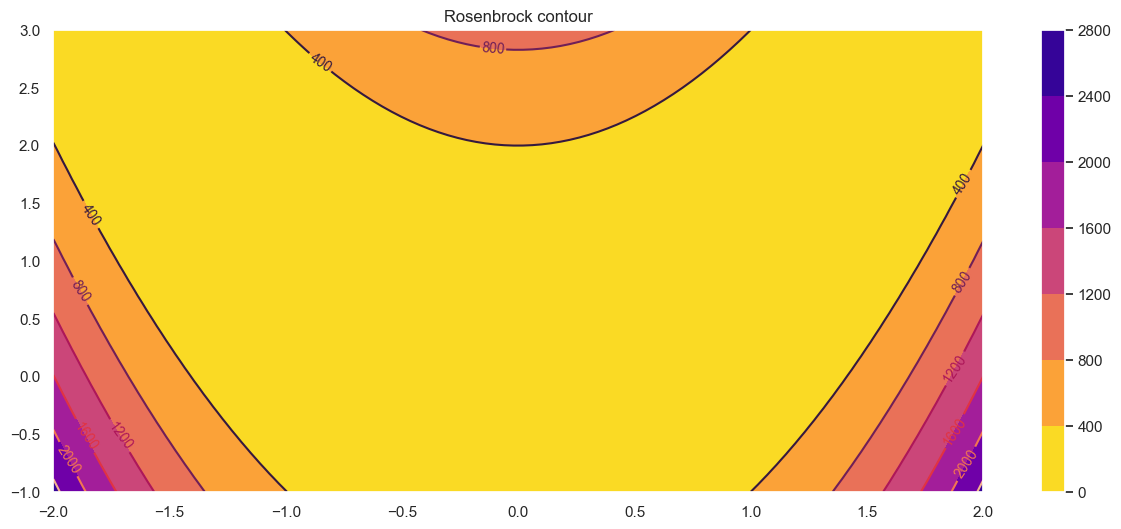

In [10]:
# creating the Rosenbrock function

def f3(x):
    return (x[0]-1)**2 + 100*(x[0]**2 - x[1])**2


xlist = np.linspace(-2, 2, 100)
ylist = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(xlist, ylist)

fig, ax = plt.subplots(1, figsize=(15, 6))
cp = ax.contourf(X, Y, f3((X, Y)), cmap='plasma_r')
cd = ax.contour(X, Y, f3((X, Y)), linewidth=0.5, inline=1)
plt.clabel(cd, inline=1, fontsize=10)
fig.colorbar(cp)  # Add a colorbar to a plot
ax.set_title('Rosenbrock contour')
plt.show()


Q11. Is $f_3$ admits a unique minimizer? If so find it.

$$f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,$$

$$f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,$$

$$ \frac{\partial f_3}{\partial w_1} = 2(w_1-1) + 400(w_1^2 - w_2)w_1 $$
$$ \frac{\partial f_3}{\partial w_2} = -200(w_1^2 - w_2) $$

Setting the two partial derivatives to 0 we obtain the following system:

$$ \begin{cases}
    2(w_1-1) + 400(w_1^2 - w_2)w_1 = 0\\
    -200(w_1^2 - w_2) = 0
    \end{cases}
$$
which gives 

$$ \begin{cases}
    w_1 = 1\\
    w_2 = 1
    \end{cases}
$$

as a solution

The hessian matrix is 
$$ H = \left[ {\begin{array}{cc}
    2 + 1200w_1^2 - 400w_2 & -400w1 \\
    -400w1 & 200 \\
  \end{array} } \right]
$$
which is positive definite. <br>

Hence the function is convex and therefore $ w = (1,1) $  is a unique minimizer

Q12. Apply GD to $f_3$ for different choice of learning rates and starting from $w_0 = (-1,1)$. Comment your results.

In [11]:
# gradient of the Rosenbrock function
def f3_prime(x):
    result = np.zeros((2))

    result[0] = 2*(x[0] - 1) + 400*(x[0]**2 - x[1]) * x[1]
    result[1] = -200*(x[0]**2 - x[1])

    return result


In [12]:
# perform gradient descent

x, f_prime_evaluated = gradient_descent(
    f3_prime, np.array([-1, 1]), 0.001, 10000)


C:\Users\mathi\AppData\Local\Temp\ipykernel_62136\1591182973.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth', 'inline'
  cd = ax[0].contour(X, Y, f3((X, Y)), linewidth=0.5, inline=1)


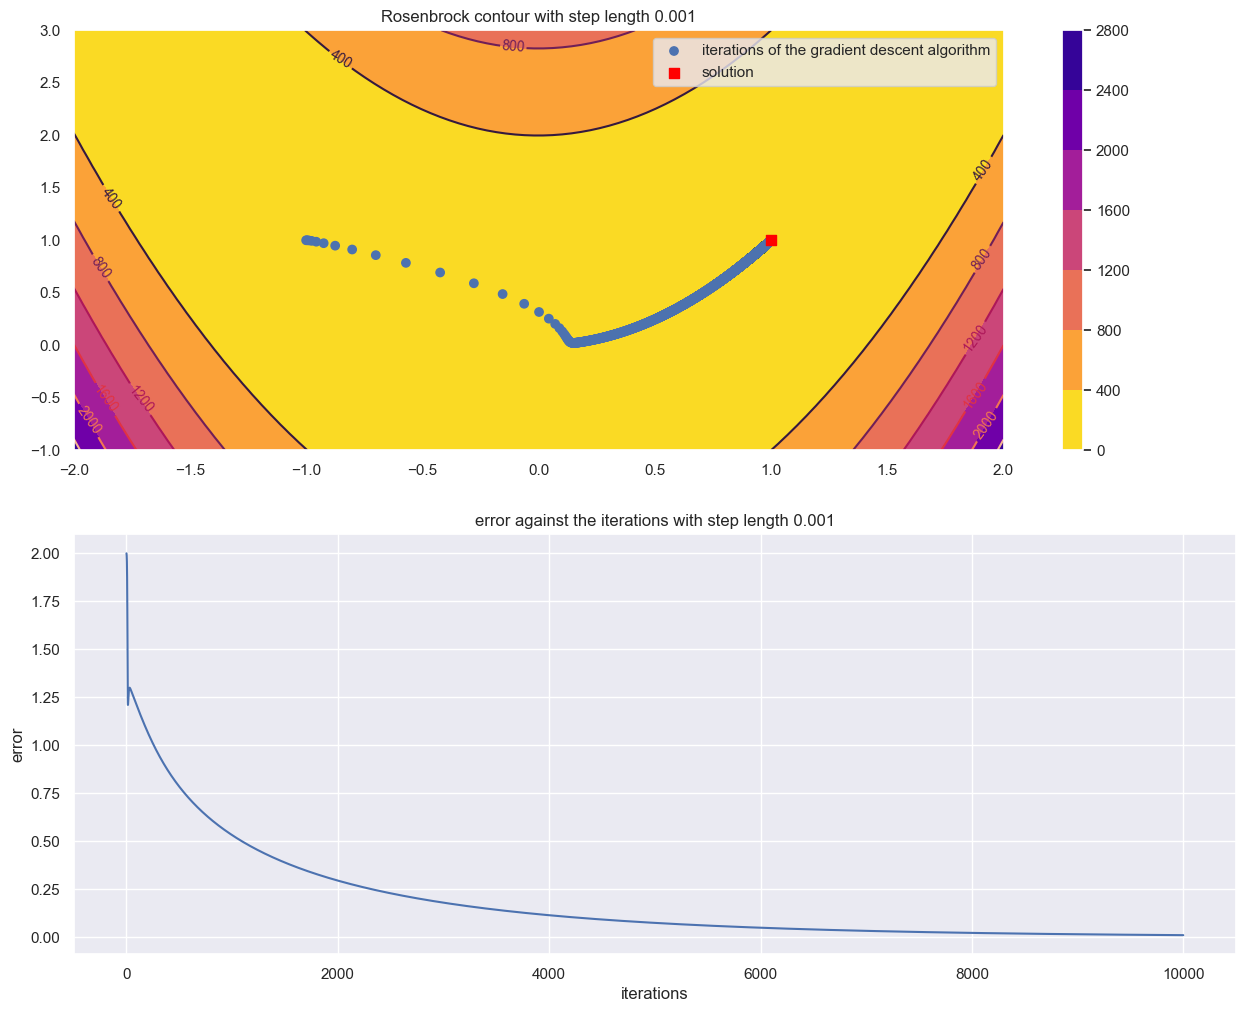

In [13]:
# function to create visualisation of the gradient descent
def plot(alpha):
    xlist = np.linspace(-2, 2, 100)
    ylist = np.linspace(-1, 3, 100)
    X, Y = np.meshgrid(xlist, ylist)

    # compute error between minimum value and k-th iteration output of the GD algorithm
    error = np.linalg.norm(x - np.array([1, 1]), axis=1)

    # if the error is greater than 10 just take the error to be 10. Otherwise error goes to infinity and it is hard to see anything on the plots
    error = np.minimum(error, 10)

    fig, ax = plt.subplots(2, 1, figsize=(15, 12))
    cp = ax[0].contourf(X, Y, f3((X, Y)), cmap='plasma_r')
    cd = ax[0].contour(X, Y, f3((X, Y)), linewidth=0.5, inline=1)
    plt.clabel(cd, inline=1, fontsize=10)

    alphas = np.linspace(0.1, 1, x.shape[0])[::-1]
    ax[0].scatter(x[:, 0], x[:, 1], alpha=alphas,
                  label='iterations of the gradient descent algorithm')
    ax[0].scatter(1, 1, marker="s", alpha=alphas,
                  label="solution", s=50, c="red")
    ax[0].legend()
    fig.colorbar(cp)  # Add a colorbar to a plot
    ax[0].set_title('Rosenbrock contour with step length ' + str(alpha))
    ax[1].set_title(
        "error against the iterations with step length " + str(alpha))
    ax[1].set_xlabel("iterations")
    ax[1].set_ylabel("error")
    ax[1].plot(error)
    plt.show()


plot(alpha=0.001)


C:\Users\mathi\AppData\Local\Temp\ipykernel_62136\3468969647.py:5: RuntimeWarning: overflow encountered in double_scalars
  result[0] = 2*(x[0] - 1) + 400*(x[0]**2 - x[1]) * x[1]
C:\Users\mathi\AppData\Local\Temp\ipykernel_62136\3468969647.py:6: RuntimeWarning: overflow encountered in double_scalars
  result[1] = -200*(x[0]**2 - x[1])
C:\Users\mathi\AppData\Local\Temp\ipykernel_62136\3468969647.py:5: RuntimeWarning: invalid value encountered in double_scalars
  result[0] = 2*(x[0] - 1) + 400*(x[0]**2 - x[1]) * x[1]
C:\Users\mathi\AppData\Local\Temp\ipykernel_62136\3468969647.py:6: RuntimeWarning: invalid value encountered in double_scalars
  result[1] = -200*(x[0]**2 - x[1])
c:\Users\mathi\anaconda3\envs\bikes-ramp\lib\site-packages\numpy\linalg\linalg.py:2556: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
C:\Users\mathi\AppData\Local\Temp\ipykernel_62136\1591182973.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth', 'inline'
  c

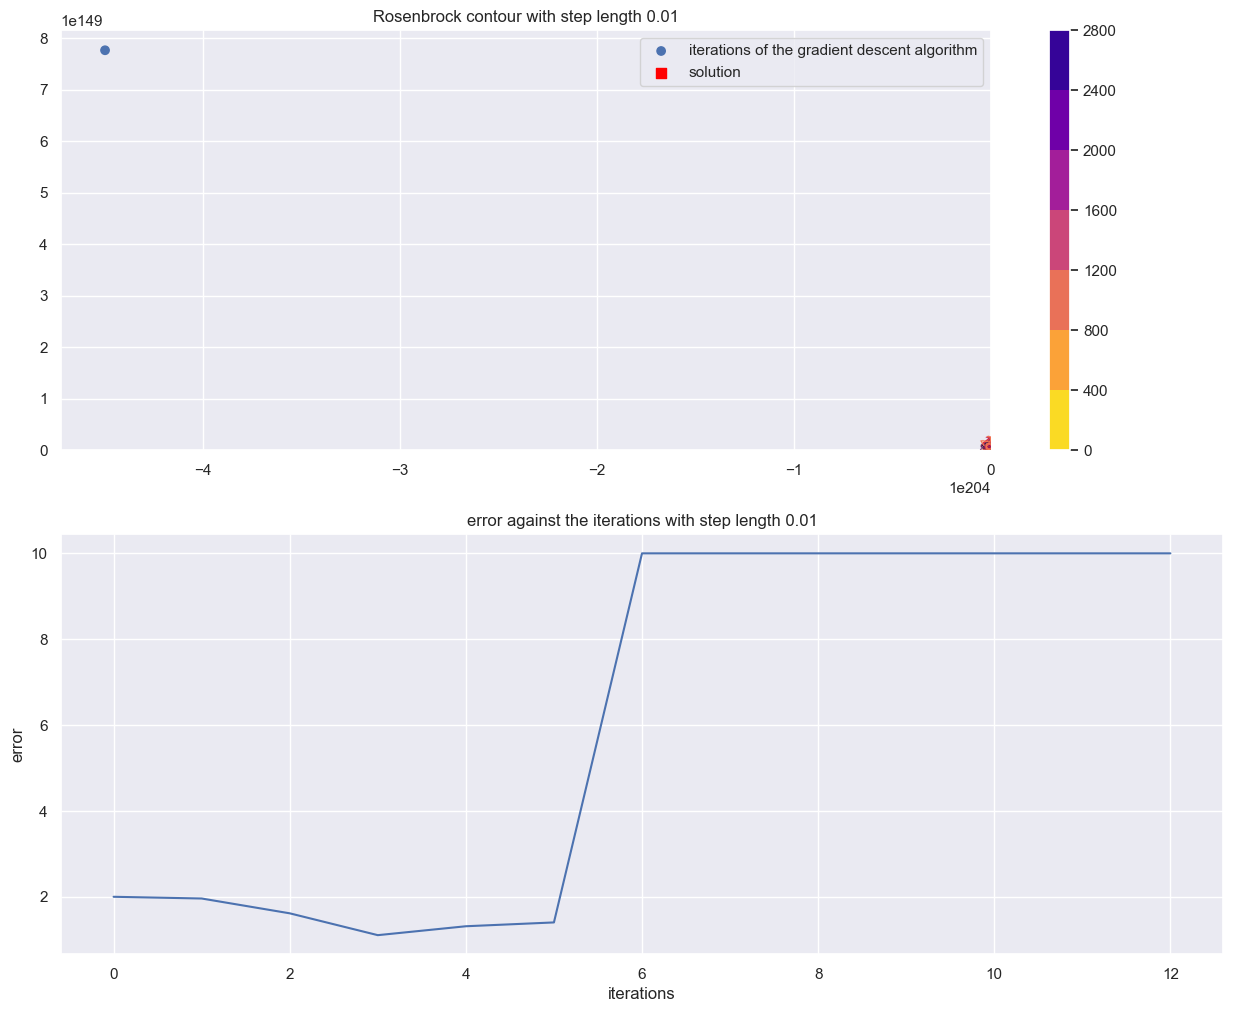

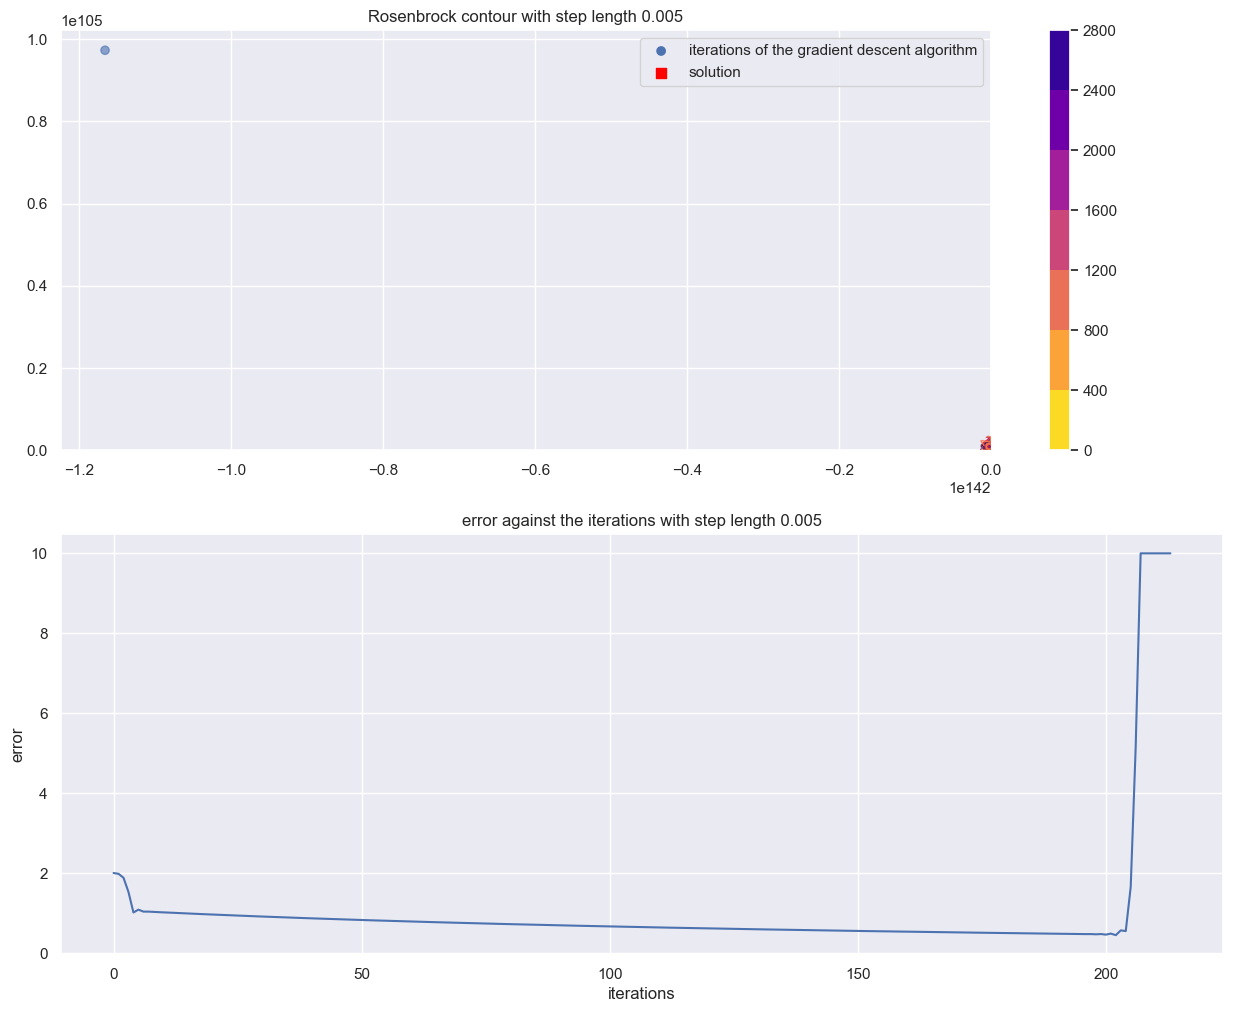

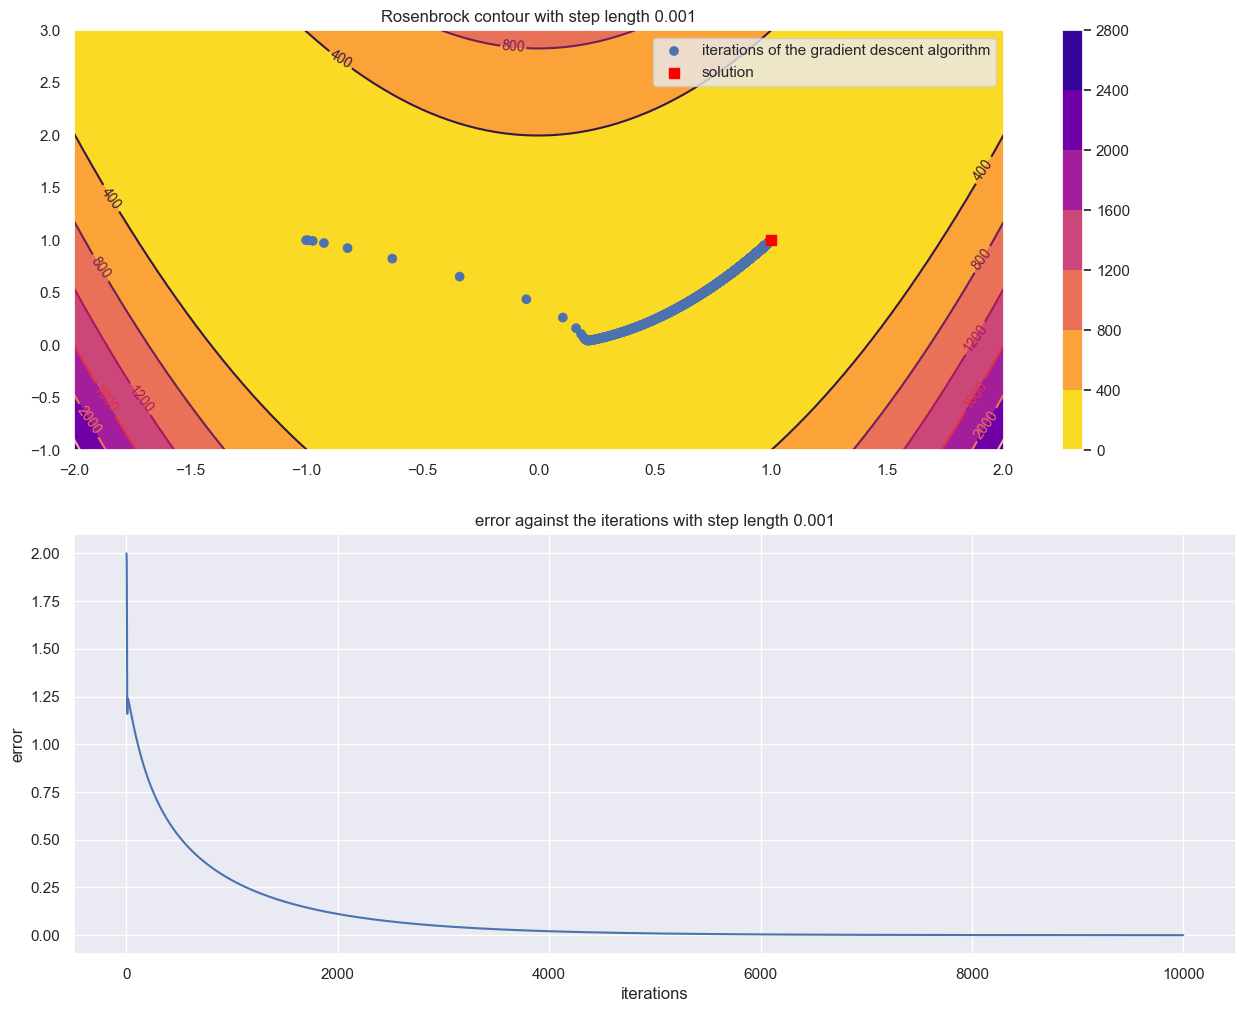

In [14]:
x, f_prime_evaluated = gradient_descent(
    f3_prime, np.array([-1, 1]), 0.01, 10000)

plot(alpha=0.01)

x, f_prime_evaluated = gradient_descent(
    f3_prime, np.array([-1, 1]), 0.005, 500)

plot(0.005)

x, f_prime_evaluated = gradient_descent(
    f3_prime, np.array([-1, 1]), 0.002, 10000)

plot(0.001)


We observe that for step length that is too big the GD algorithm does not converge.

# III. Stochastic Gradient Descent for regression

Here we consider the regression problem:
$$
Y = w_0 + w_1 X + \epsilon \, , \, \epsilon \sim \mathrm{N}(0,1) \, .
$$
Therefore, we have to minimize a function $E$ of the form
$$
E(w) = \sum_{i=1}^N E_i(w) \, ,
$$
where $N$ is the number of datapoints and $E_i$ is a function of the $i$-th datapoint.

Q13. Generate some synthetic data. Plot the training data and the regression line.

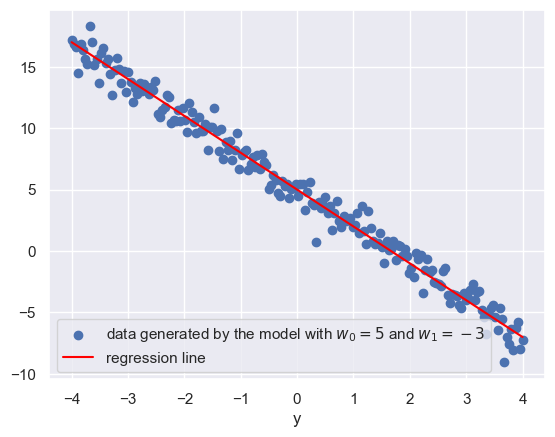

In [15]:
def generate_data(N):
    """generate data using the above model

    Args:
        N (int): number of samples

    Returns:
        float: the x and y generated by the model
    """

    X = np.linspace(-4, 4, N)
    epsilon = np.random.normal(0, 1, N)
    Y = 5 - 3*X + epsilon

    return X, Y


x, y = generate_data(200)

fig, ax = plt.subplots()

ax.scatter(x, y, label="data generated by the model with $w_0 = 5$ and $w_1 =-3$")
x_line = np.linspace(-4, 4, 100)
y_line = 5 - 3*x_line
ax.plot(x_line, y_line, c="red", label="regression line")
ax.set_xlabel("x")
ax.set_xlabel("y")
ax.legend()


plt.show()


Q.14 Use GD to estimate the regression line.

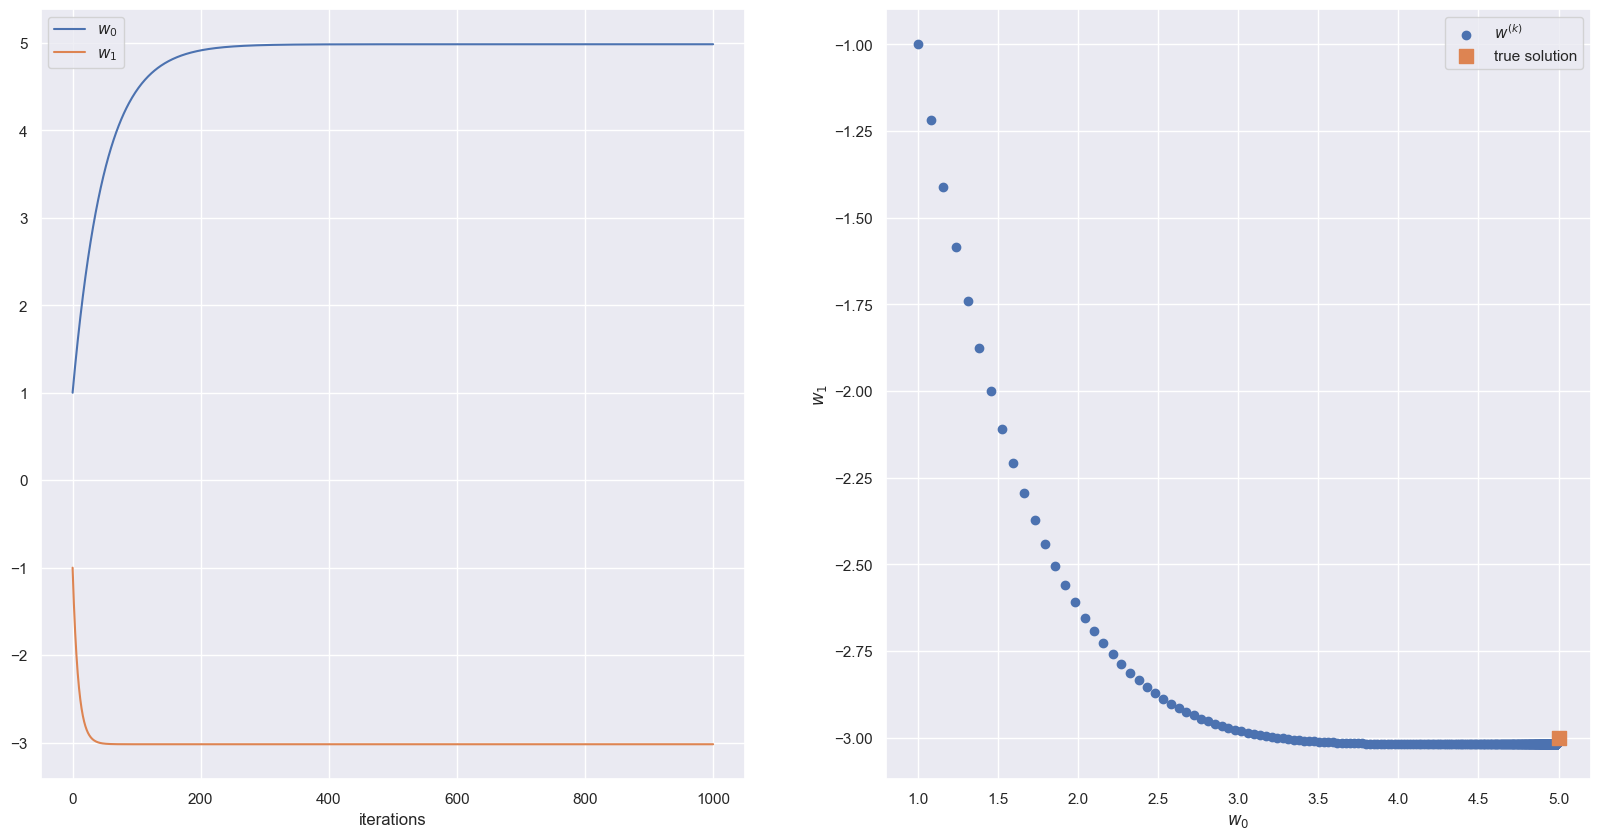

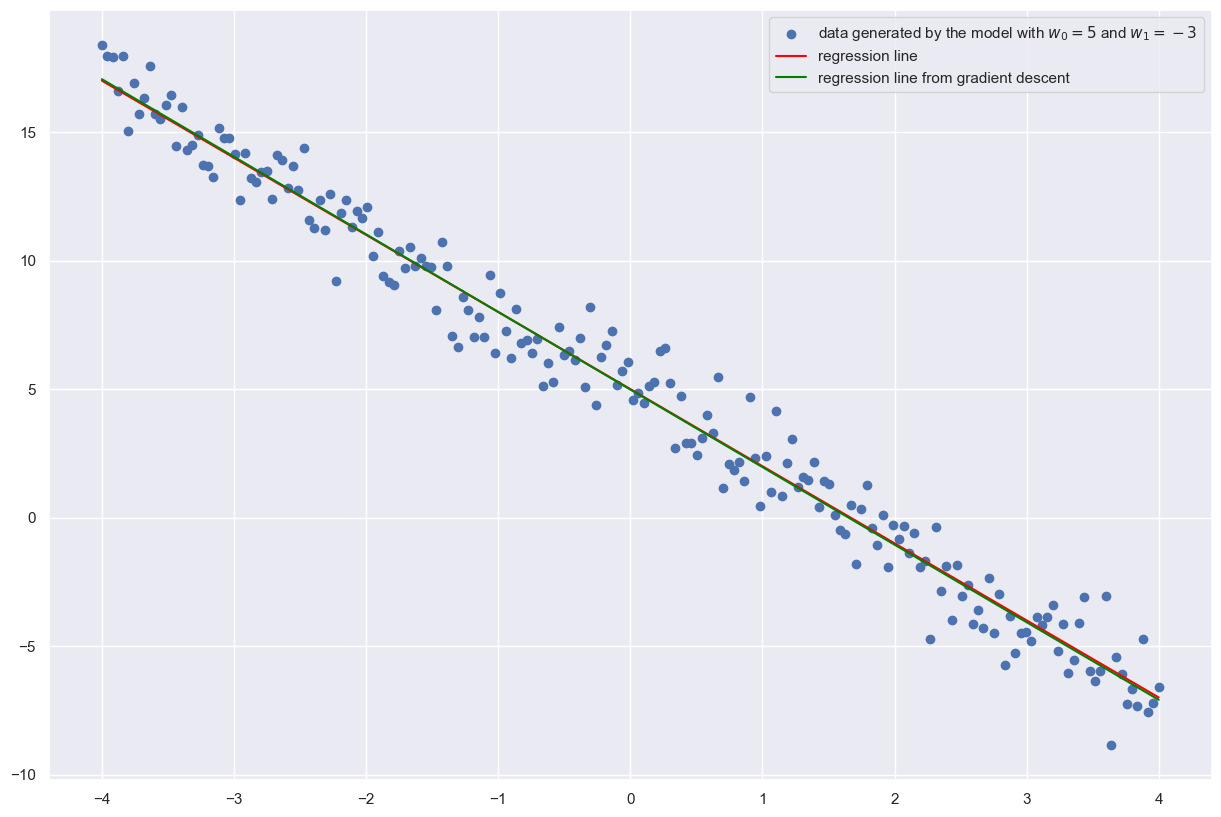

In [16]:
X, Y = generate_data(200)

# define the error function


def error(w):
    return (1/X.shape[0])*np.linalg.norm(Y - (w[0] + w[1]*X), axis=1)**2

# define the gradient of the error function


def error_prime(w):
    result = np.zeros((2))

    for i in range(X.shape[0]):
        result[0] += Y[i] - w[0] - w[1]*X[i]
        result[1] += (Y[i] - w[0] - w[1]*X[i])*X[i]

    result = (-2/X.shape[0])*result
    return result


# perform the gradient descent on the linear regression problem
w, f_w_evaluated = gradient_descent(
    error_prime, np.array([1, -1]), alpha=0.01, n_iter=1000)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(w, label=["$w_0$", "$w_1$"])
ax[0].set_xlabel("iterations")
ax[0].legend()


ax[1].scatter(w[:, 0], w[:, 1], label="$w^{(k)}$")
ax[1].scatter(5, -3, marker="s", s=100, label="true solution")
ax[1].set_xlabel("$w_0$")
ax[1].set_ylabel("$w_1$")
ax[1].legend()


plt.show()


fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, Y, label="data generated by the model with $w_0 = 5$ and $w_1 =-3$")
x_line = np.linspace(-4, 4, 200)
y_line = 5 - 3*x_line
y_line_svd = w[-1, 0] + w[-1, 1]*x_line
ax.plot(x_line, y_line, c="red", label="regression line")
ax.plot(x_line, y_line_svd, label="regression line from gradient descent", c="green")
ax.legend()


plt.show()


Q15 Estimate the convergence rate of the gradient descent algorithm.

We first check for quadratic convergence. We say the sequence converges at a quadratic rate if there exists some constant $ 0<M<\infty$ such that  $$ratio = \frac{\|x_{n+1}-x_\infty\|}{\|x_n-x_\infty\|^2}\leq M$$ for n sufficiently large.

We then check linear convergence.
We say the sequence converges linearly if $$ ratio1 = \frac{\|x_{n+1}-x_\infty\|}{\|x_n-x_\infty\|}\leq M$$ 


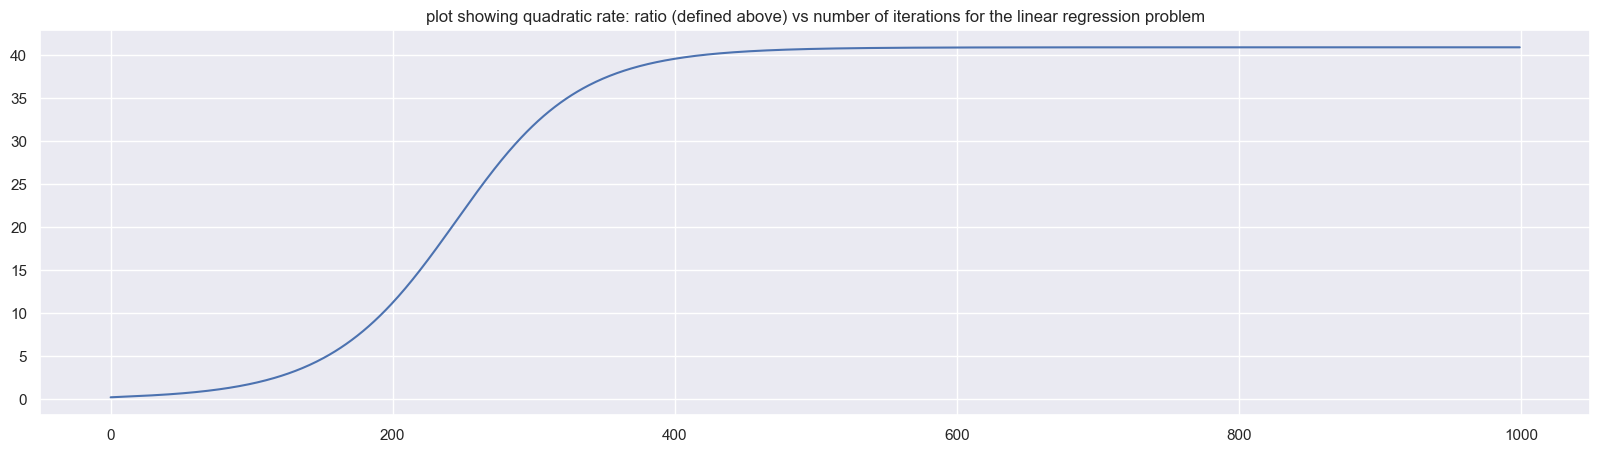

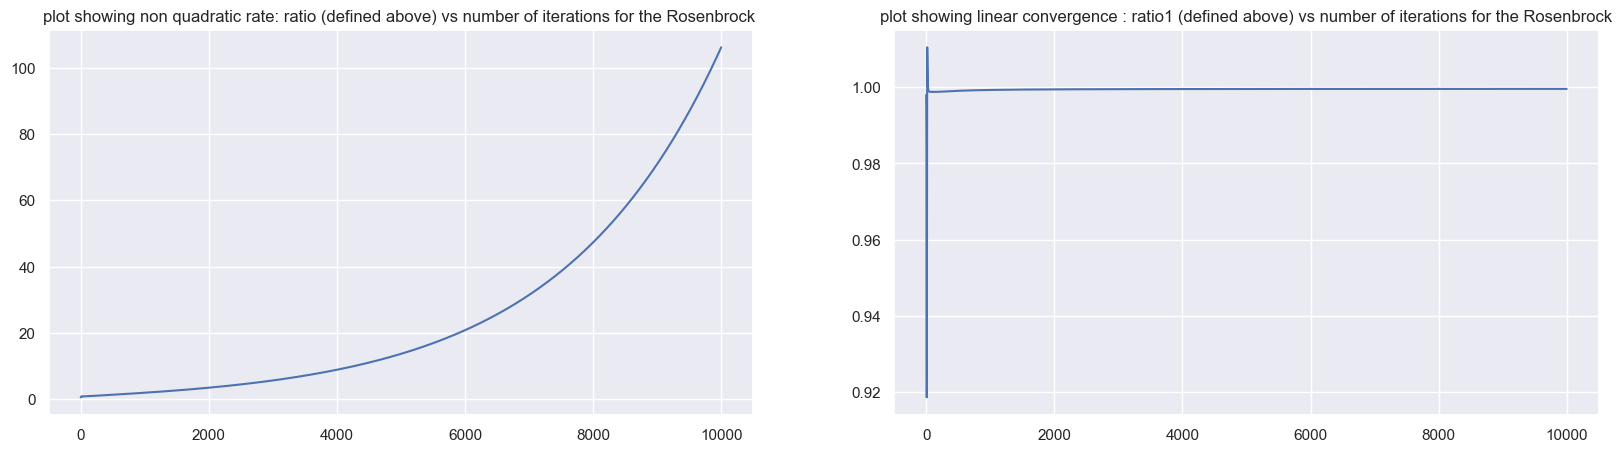

In [17]:
# convergence rate of the GD for the regression line problem

w_star = np.array([5, -3])

error_lin = np.linalg.norm(w-w_star, axis=1)
error_square_lin = error_lin**2

fig, ax = plt.subplots(figsize=(20, 5))
ratio = np.zeros(w.shape[0]-1)
for i in range(w.shape[0]-1):
    ratio[i] = error_lin[i+1]/error_square_lin[i]
ax.set_title(
    "plot showing quadratic rate: ratio (defined above) vs number of iterations for the linear regression problem")
ax.plot(ratio)
plt.show()
# convergence rate of the GD for the Rosenbrock minimizer problem

x, f_prime_evaluated = gradient_descent(
    f3_prime, np.array([-1, 1]), 0.001, 10000)
x_star = np.array([1, 1])
error_ros = np.linalg.norm(x-x_star, axis=1)
error_square_ros = error_ros**2

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ratio = np.zeros((x.shape[0]-1, 2))
for i in range(x.shape[0]-1):
    ratio[i, 0] = error_ros[i+1]/error_square_ros[i]
    ratio[i, 1] = error_ros[i+1]/error_ros[i]
ax[0].plot(ratio[:, 0])
ax[0].set_title(
    "plot showing non quadratic rate: ratio (defined above) vs number of iterations for the Rosenbrock ")
ax[1].plot(ratio[:, 1])
ax[1].set_title(
    "plot showing linear convergence : ratio1 (defined above) vs number of iterations for the Rosenbrock")
plt.show()


We observe that the convergence rate of the gradient descent is quadratic (taking M = 40 in the definition) for the regression line problem and linear for finding the minimizer of the Rosenbrock function (taking M =2). Therefore, we conclude that the convergence rate of the GD algorithm depends on the problem and that experimentally, we have seen that it cannot be worst than superlinear.

Q14 Apply random batch SGD for this regression problem:
$$
w_{n+1} = w_n - \eta \nabla E_{I_{n+1}}(w_n) \, ,
$$
where $(I_n)_n$ is a sequence of iid random variables uniform on $\{1,\ldots,N\}$.

In [18]:
def error_prime(w, X, Y):
    result = np.zeros((2))

    for i in range(X.shape[0]):
        result[0] += Y[i] - w[0] - w[1]*X[i]
        result[1] += (Y[i] - w[0] - w[1]*X[i])*X[i]

    result = (-2/X.shape[0])*result
    return result


In [19]:
def batch_SGD(X, Y, f_prime, x_0, alpha, n_iter, batch_size=1,):

    x = np.zeros((n_iter+1, x_0.shape[0]))
    f_eval = np.zeros((n_iter+1, x_0.shape[0]))
    x[0] = x_0

    # batch algorithm
    for i in range(1, n_iter+1):

        index = np.arange(X.shape[0])
        batch = np.random.choice(index, batch_size, replace=False)
        x[i] = x[i-1] - alpha*error_prime(x[i-1], X[batch], Y[batch])

    return x


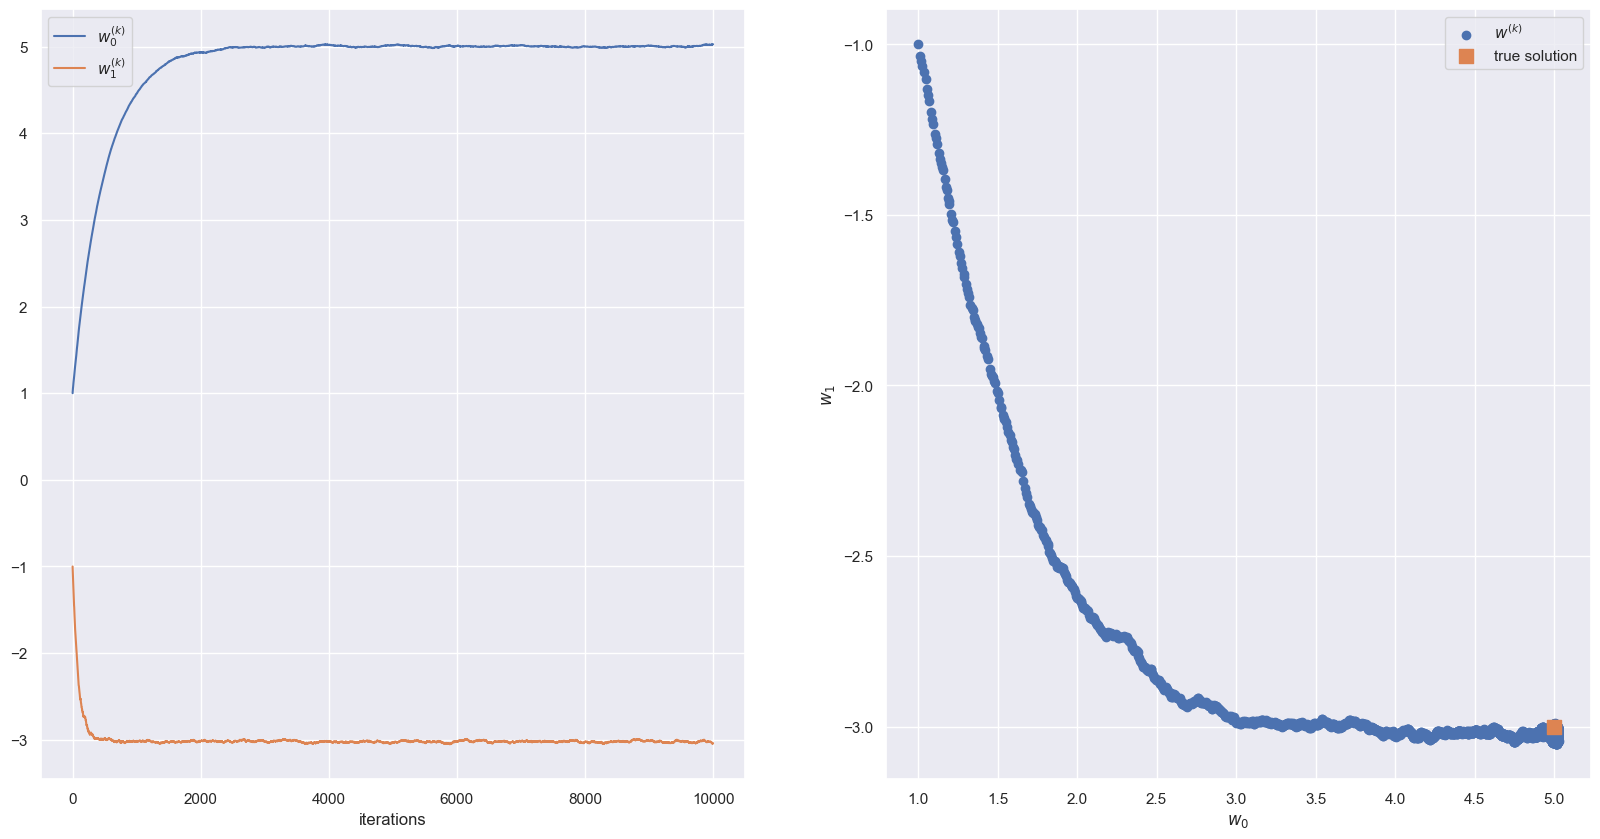

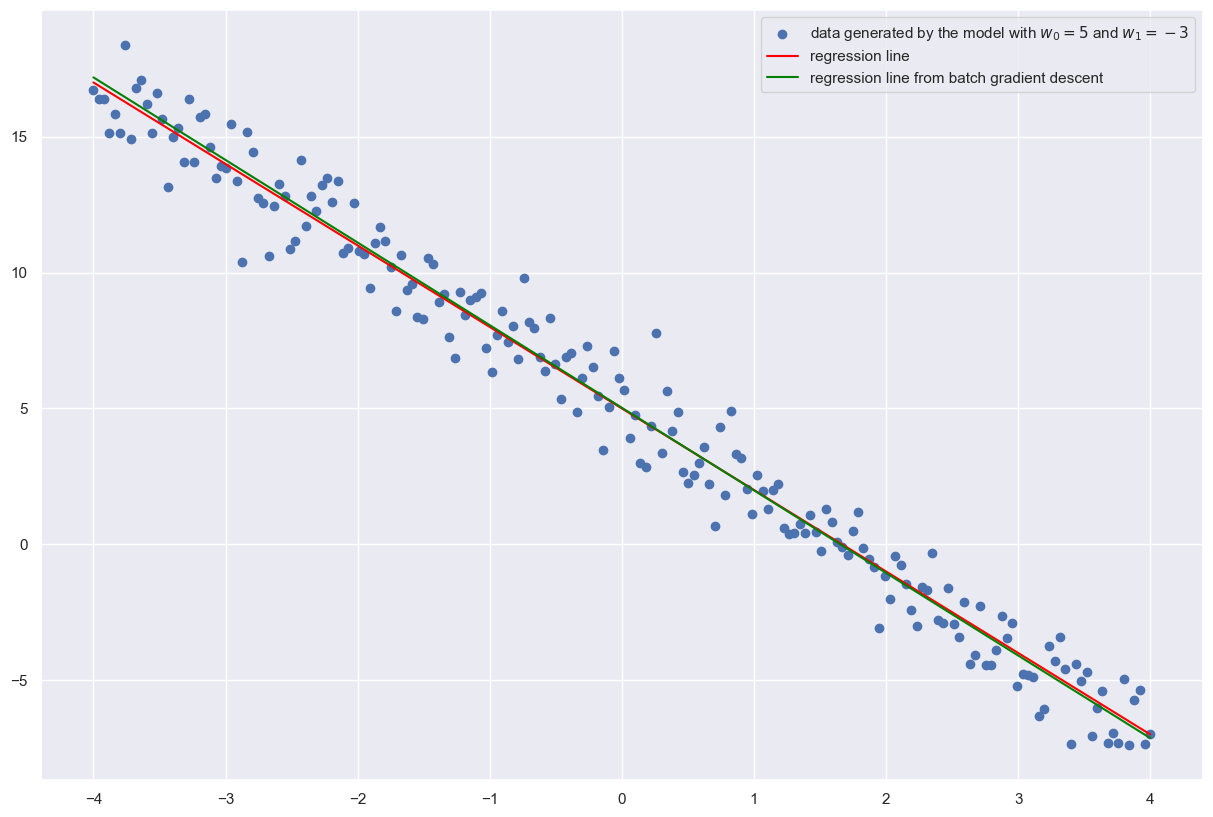

In [20]:
X, Y = generate_data(200)
w = batch_SGD(X, Y, error_prime, np.array(
    [1, -1]), alpha=0.001, n_iter=10000, batch_size=10)


fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(w, label=["$w_0^{(k)}$", "$w_1^{(k)}$"])
ax[0].set_xlabel("iterations")
ax[0].legend()


ax[1].scatter(w[:, 0], w[:, 1], label="$w^{(k)}$")
ax[1].scatter(5, -3, marker="s", s=100, label="true solution")
ax[1].set_xlabel("$w_0$")
ax[1].set_ylabel("$w_1$")
ax[1].legend()


plt.show()


fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, Y, label="data generated by the model with $w_0 = 5$ and $w_1 =-3$")
x_line = np.linspace(-4, 4, 200)
y_line = 5 - 3*x_line
y_line_svd = w[-1, 0] + w[-1, 1]*x_line
ax.plot(x_line, y_line, c="red", label="regression line")
ax.plot(x_line, y_line_svd, label="regression line from batch gradient descent", c="green")
ax.legend()


plt.show()


Q15. Show that the SGD iterates do not converge.

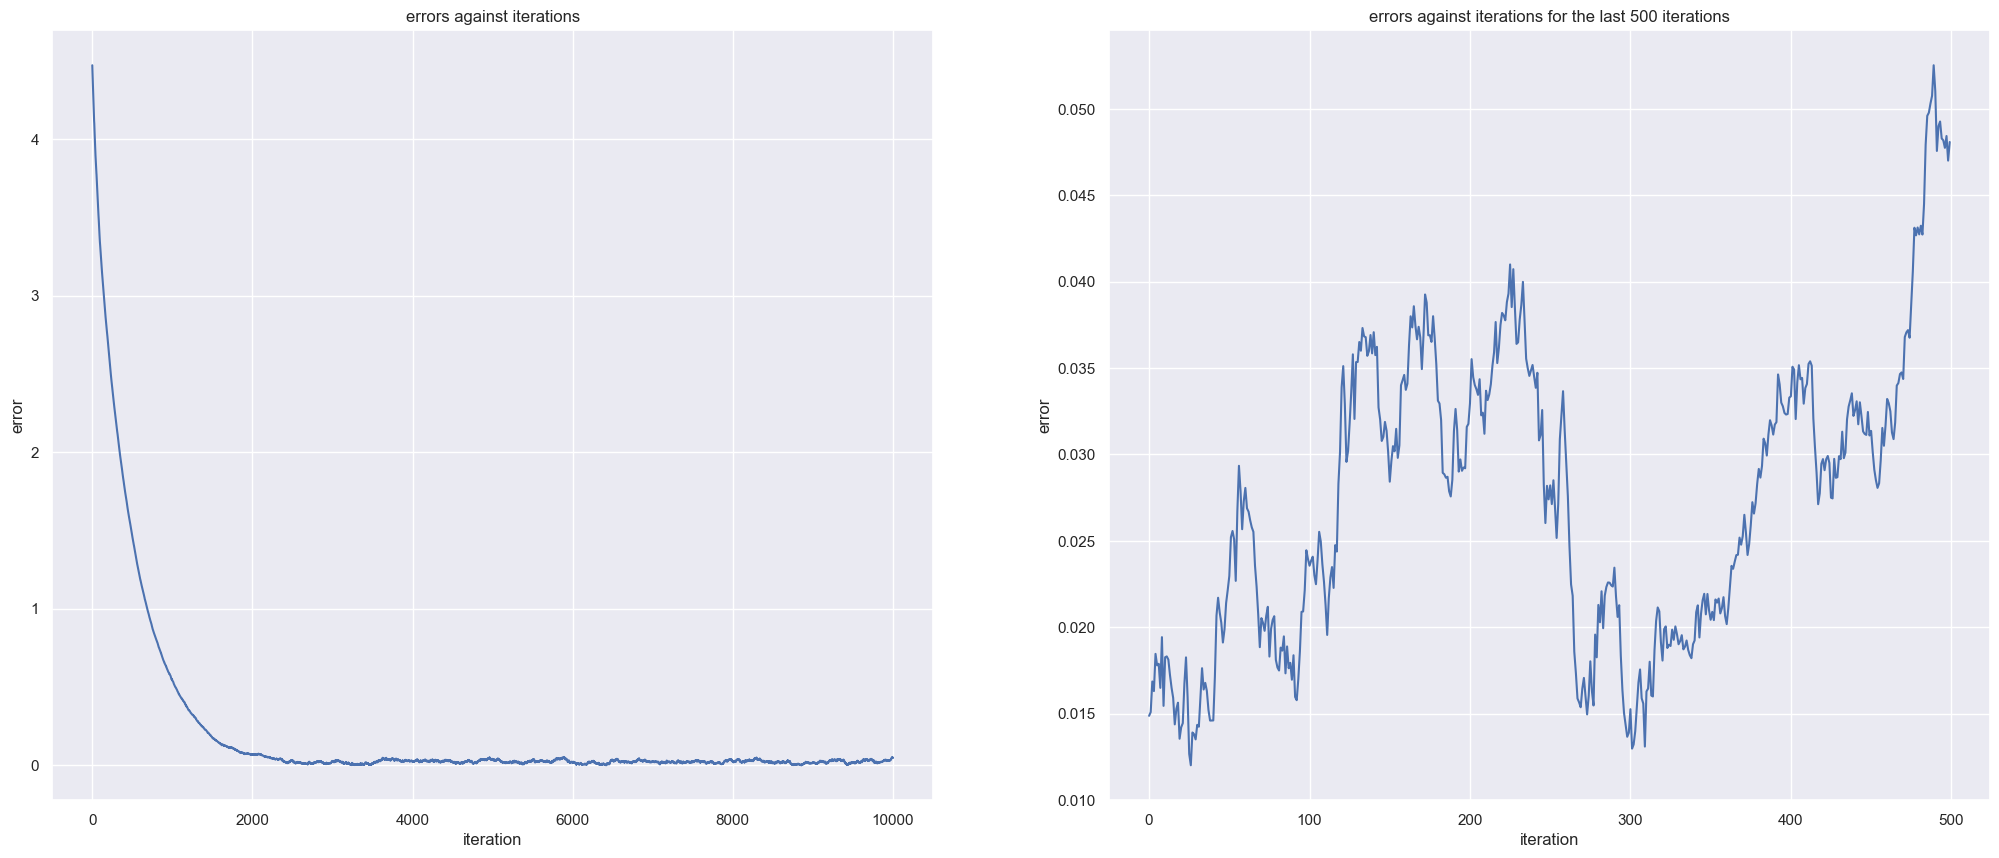

In [21]:
def plot_error():
    fig, ax = plt.subplots(1, 2, figsize=(25, 10))
    sol = np.array([5, -3])
    error = np.linalg.norm(sol - w, axis=1)
    ax[0].plot(error)
    ax[0].set_xlabel("iteration")
    ax[0].set_ylabel("error")
    ax[0].set_title("errors against iterations")
    ax[1].plot(error[-500:])
    ax[1].set_xlabel("iteration")
    ax[1].set_ylabel("error")
    ax[1].set_title("errors against iterations for the last 500 iterations")


plot_error()


We clearly see that although the errors diminish and seem to go to 0 on the left graph, when looking at the 500 last errors on the right plot, we see that the error does not go to 0 but stabilizes between 0.020 and 0.050.

Q16. (Optional) Show that when the SGD iterates seem to be stabilize, they stay in a neighborhood with length which decreases linearly with the learning rate.

In [22]:
alpha = np.linspace(0.1, 0.0001, 100)
lengths = np.zeros(100)
i = 0
sol = np.array([5, -3])
for step_length in alpha:
    w = batch_SGD(X, Y, error_prime, np.array(
        [1, -1]), alpha=step_length, n_iter=10000, batch_size=10)
    last_errors = np.linalg.norm(sol-w[-500:, :], axis=1)
    lengths[i] = np.max(last_errors) - np.min(last_errors)
    i += 1


Text(0, 0.5, 'max error length')

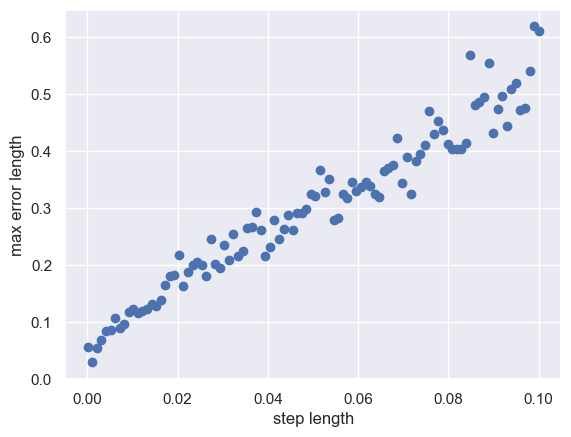

In [23]:
fig, ax = plt.subplots()
ax.scatter(alpha, lengths)
ax.set_xlabel("step length")
ax.set_ylabel("max error length")


We can wee clearly see that there is a linear relationship between the step lengths and the length.